<a href="https://colab.research.google.com/github/abigailalbuquerque/SimpleAndComparableSleepStageScoring/blob/collab_code/EEG_spectrogram_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries 
import tensorflow as tf
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import wave
import pylab
from pathlib import Path
from scipy import signal
from scipy.io import wavfile
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score, cohen_kappa_score
from sklearn.utils import class_weight

In [ ]:
# Clear the direcotry
!rm -rf 'training_set_00_17'
!rm -rf 'test_set_18_19'

In [ ]:
# Unzip imported training and testing dataset 
!unzip training_set_00_17.zip
!unzip test_set_18_19.zip

In [ ]:
# Process imported raw image dataset from direcotry into train and test dataset

IMAGE_HEIGHT = 154
IMAGE_WIDTH = 28
BATCH_SIZE = 32
N_CHANNELS = 1       # =1 if color_mode='grayscale'; =3 if color_mode='rgb'
N_CLASSES = 5

training_set = 'training_set_00_17'
test_set = 'test_set_18_19'

# Make a dataset containing the training spectrograms
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.25,
                                             directory=os.path.join('/content', training_set),
                                             shuffle=True,
                                             color_mode='grayscale',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="training",
                                             seed=0)

# Make a dataset containing the validation spectrogram
valid_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0.25,
                                             directory=os.path.join('/content', training_set),
                                             shuffle=True,
                                             color_mode='grayscale',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             subset="validation",
                                             seed=0)

# Make test set
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
                                             batch_size=BATCH_SIZE,
                                             validation_split=0,
                                             directory=os.path.join('/content', test_set),
                                             shuffle=False,
                                             color_mode='grayscale',
                                             image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
                                             seed=0)



Found 38320 files belonging to 5 classes.
Using 28740 files for training.
Found 38320 files belonging to 5 classes.
Using 9580 files for validation.
Found 4693 files belonging to 5 classes.


In [ ]:
# dataset structure: batch_size * num_of_batches = total data
counter = 0
for images, labels in test_dataset:
    counter = counter + 1
    print(labels)  
print(counter)

In [ ]:
# Show the training dataset images with label 
plt.figure(figsize=(7, 36))
for images, labels in train_dataset.take(1):
    for i in range(3):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")
        # print(images)   
plt.show()

In [ ]:
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten()) # reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)


# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

In [ ]:
# Create CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input(shape=(IMAGE_HEIGHT, IMAGE_WIDTH, N_CHANNELS)))
model.add(tf.keras.layers.Conv2D(32, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(64, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Conv2D(128, 3, activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Flatten()) # reshapes the tensor to have a shape that is equal to the number of elements contained in the tensor 
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(N_CLASSES, activation='softmax'))

# Compile model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(),
    metrics=['accuracy'],
)


# Train model for 10 epochs, capture the history
history = model.fit(train_dataset, epochs=10, validation_data=valid_dataset)

Epoch 1/10
899/899 [==============================] - 14s 13ms/step - loss: 1.0911 - accuracy: 0.6007 - val_loss: 0.8327 - val_accuracy: 0.6889
Epoch 2/10
899/899 [==============================] - 12s 14ms/step - loss: 0.8517 - accuracy: 0.6688 - val_loss: 1.2345 - val_accuracy: 0.5881
Epoch 3/10
899/899 [==============================] - 12s 13ms/step - loss: 0.8110 - accuracy: 0.6906 - val_loss: 0.8421 - val_accuracy: 0.6734
Epoch 4/10
899/899 [==============================] - 12s 13ms/step - loss: 0.7856 - accuracy: 0.7041 - val_loss: 0.7848 - val_accuracy: 0.7062
Epoch 5/10
899/899 [==============================] - 14s 15ms/step - loss: 0.7730 - accuracy: 0.7114 - val_loss: 0.7468 - val_accuracy: 0.7210
Epoch 6/10
899/899 [==============================] - 12s 13ms/step - loss: 0.7606 - accuracy: 0.7142 - val_loss: 0.7332 - val_accuracy: 0.7316
Epoch 7/10
899/899 [==============================] - 12s 13ms/step - loss: 0.7603 - accuracy: 0.7166 - val_loss: 0.7360 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 152, 26, 32)       320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 76, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 74, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 37, 5, 64)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 35, 3, 128)        73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 1, 128)      

147/147 [==============================] - 2s 12ms/step
Overall Accuracy:  0.681
Precision per-class: [0.563 0.275 0.808 0.867 0.516]
Recall per-class: [0.703 0.038 0.835 0.551 0.691]
F1 per-class: [0.625 0.067 0.822 0.674 0.591]
F1(weighted): 0.663
         True  Pred
[['Wake' '849' '1061']
 ['N1' '370' '51']
 ['N2' '1945' '2010']
 ['N3' '677' '430']
 ['REM' '852' '1141']]


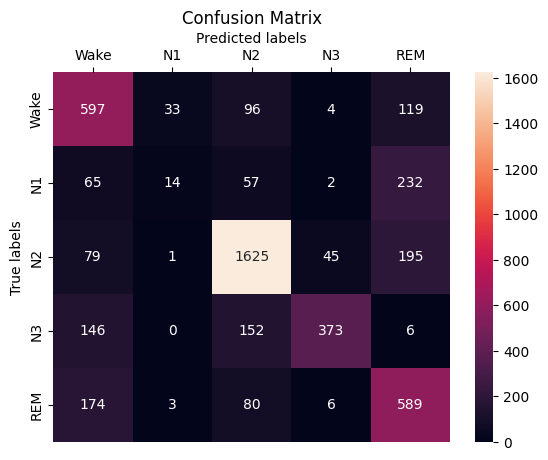

In [ ]:
# Evaluate the model with test_set
predictions = model.predict(test_dataset)
label_pred = np.array([])
for sub in predictions:
  max_idx = np.argmax(sub)
  label_pred = np.append(label_pred, max_idx)
test_label = np.concatenate([y for x, y in test_dataset], axis=0)

# Get confusion matrix and plot out
cm = confusion_matrix(test_label, label_pred)

# Get acc, precision, recall, and f1
acc = accuracy_score(test_label, label_pred)
print('Overall Accuracy: ', acc.round(3))
precision = precision_score(test_label, label_pred, average=None)
print('Precision per-class:', precision.round(3))
recall = recall_score(test_label, label_pred, average=None)
print('Recall per-class:', recall.round(3))
f1score = f1_score(test_label, label_pred, average=None)
print('F1 per-class:', f1score.round(3))
f1weighted = f1_score(test_label, label_pred, average='weighted')   # conpute the f1 for each label and returns the average considering the proportion of each label
print('F1(weighted):', f1weighted.round(3))

# Plot the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt 
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Wake', 'N1', 'N2', 'N3', 'REM']); ax.yaxis.set_ticklabels(['Wake', 'N1', 'N2', 'N3', 'REM']);
# move labels to the top
ax.tick_params(top=True, labeltop=True, bottom=False, labelbottom=False)
ax.xaxis.set_label_position('top') 

# Get the number of different classes from true and pred
print('         True  Pred')
unique, true_counts = np.unique(test_label, return_counts=True)
unique, pred_counts = np.unique(label_pred, return_counts=True)
print(np.asarray((['Wake', 'N1', 'N2', 'N3', 'REM'], true_counts, pred_counts)).T)



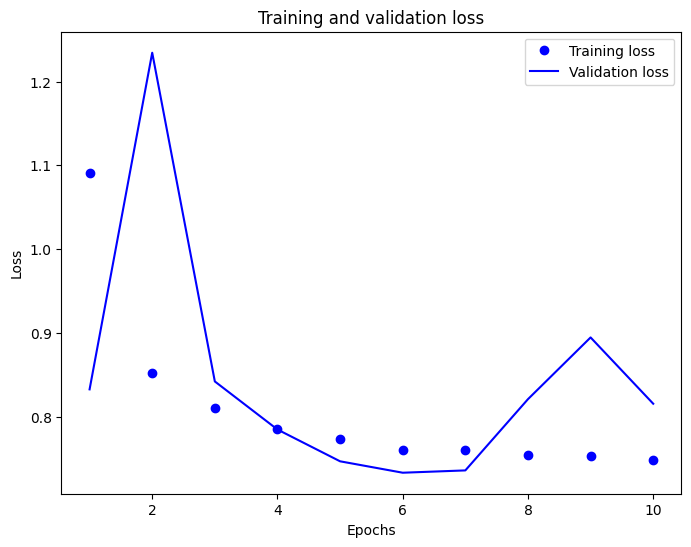

In [ ]:
# Plot the loss curves for training and validation.
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

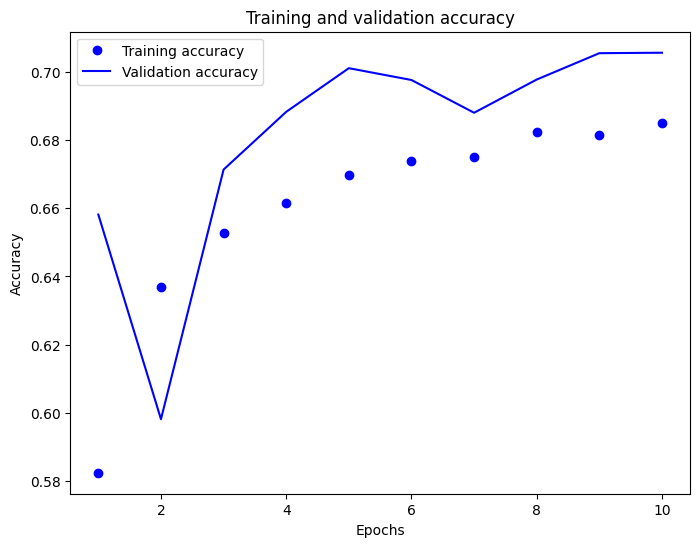

In [ ]:
# Plot the accuracy curves for training and validation.
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(acc_values)+1)

plt.figure(figsize=(8,6))
plt.plot(epochs, acc_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()